                  date        p     T    Tpot  Tdew    rh  VPmax  VPact  \
0  2020-01-01 00:10:00  1008.89  0.71  273.18 -1.33  86.1   6.43   5.54   
1  2020-01-01 00:20:00  1008.76  0.75  273.22 -1.44  85.2   6.45   5.49   
2  2020-01-01 00:30:00  1008.66  0.73  273.21 -1.48  85.1   6.44   5.48   
3  2020-01-01 00:40:00  1008.64  0.37  272.86 -1.64  86.3   6.27   5.41   
4  2020-01-01 00:50:00  1008.61  0.33  272.82 -1.50  87.4   6.26   5.47   

   VPdef    sh  ...      rho    wv  max. wv     wd  rain  raining  SWDR  PAR  \
0   0.89  3.42  ...  1280.62  1.02     1.60  224.3   0.0      0.0   0.0  0.0   
1   0.95  3.39  ...  1280.33  0.43     0.84  206.8   0.0      0.0   0.0  0.0   
2   0.96  3.39  ...  1280.29  0.61     1.48  197.1   0.0      0.0   0.0  0.0   
3   0.86  3.35  ...  1281.97  1.11     1.48  206.4   0.0      0.0   0.0  0.0   
4   0.79  3.38  ...  1282.08  0.49     1.40  209.6   0.0      0.0   0.0  0.0   

   max. PAR   Tlog  
0       0.0  11.45  
1       0.0  11.51  
2    

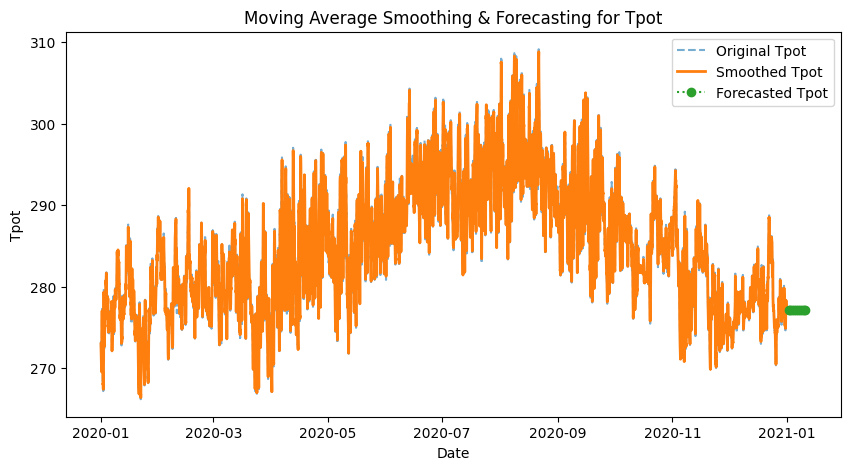

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your cleaned weather data
df = pd.read_csv("cleaned_weather.csv")

# Clean up any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Display the first few rows and the column names to check if the 'date' column is present
print(df.head())
print(df.columns)

# If 'date' is present, parse it as a date column
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
else:
    raise ValueError("'date' column is missing in the dataset.")

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Check if the 'Tpot' column exists
if "Tpot" not in df.columns:
    raise ValueError("Dataset must contain a 'Tpot' column.")

# Moving Average Function
def moving_average(series, window):
    return series.rolling(window=window).mean()

# Apply Moving Average Smoothing
window_size = 7  # Weekly moving average
df["Smoothed"] = moving_average(df["Tpot"], window_size)

# Forecasting Future Temperatures using Moving Average
future_steps = 10
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq="D")
future_temperatures = [df["Smoothed"].iloc[-window_size:].mean()] * future_steps  # Simple extension

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Tpot"], label="Original Tpot", linestyle="dashed", alpha=0.6)
plt.plot(df.index, df["Smoothed"], label="Smoothed Tpot", linewidth=2)
plt.plot(future_dates, future_temperatures, label="Forecasted Tpot", linestyle="dotted", marker="o")

plt.xlabel("Date")
plt.ylabel("Tpot")  # Adjust label if needed
plt.legend()
plt.title("Moving Average Smoothing & Forecasting for Tpot")
plt.show()
